<a href="https://colab.research.google.com/github/dariamm03/Machine_Learning/blob/main/MachineLearning4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание:
Построить прогноз температуры воздуха, курса валюты и т.п. на основе предыдущих значений.

Необходимо взять не менее 100 значений и разбить их на 2 выборки (80/20) и использовать первые 80 значений для обучения моделей:
- методом МНК для функций y=c0+c1*x+c2*x^2;
- методом kNN;
- ARIMA модели.

Построить графики получаемых с использованием построенных моделей функций и нанести значения из тренировочной и тестовой выборок.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

from math import floor,ceil,sqrt
import sys
import warnings
import datetime as dt

if not sys.warnoptions:
    warnings.simplefilter("ignore")
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('microsoft.csv',sep=",")
df2 = pd.read_csv('microsoft.csv',sep=",")
df.head(8)

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
5,4/9/2015 16:00:00,41.25,41.62,41.25,41.48,25723861
6,4/10/2015 16:00:00,41.63,41.95,41.41,41.72,28022002
7,4/13/2015 16:00:00,41.40,42.06,41.39,41.76,30276692


**kNN**

In [ ]:
# превратим дату в индекс и сделаем изменение постоянным
df.set_index('Date', inplace = True)
df.head()
df.index = pd.to_datetime(df.index)

Shape of Training Set (1209, 1)
Shape of Validation Set (302, 1)


<ipython-input-39-3064a589f02d>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_set['Predictions'] = preds


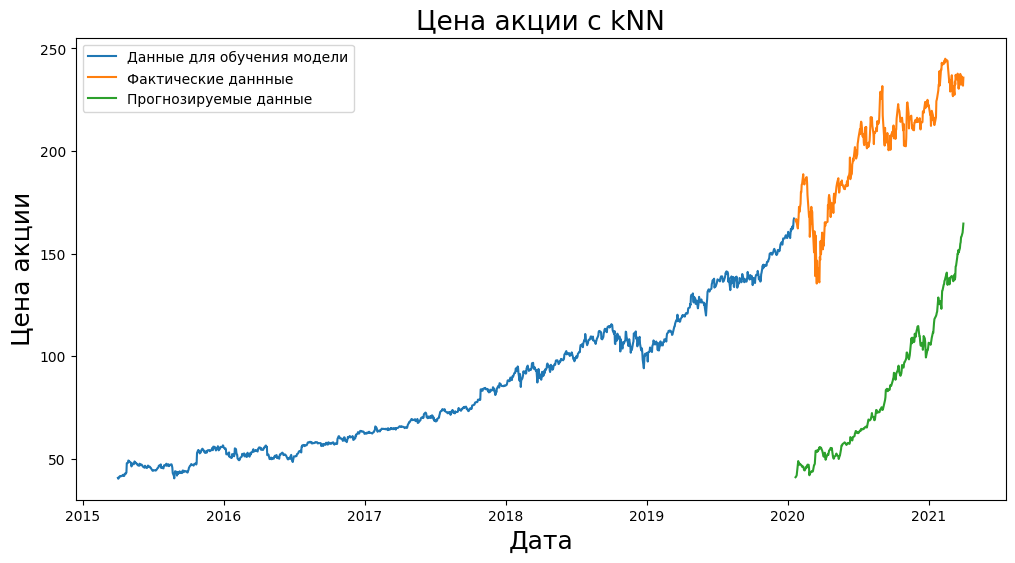

In [ ]:
def k_nearest_neighbours_predict(df):
    shape=df.shape[0] #общее кол-во строк
    df_new=df[['Close']]
    df_new.head()
    train_set=df_new.iloc[:ceil(shape*0.8)] #возвращает индексирование. первые значения, на которых будем учиться и прогнозировать
    valid_set=df_new.iloc[ceil(shape*0.8):] #значения по которым будем сравнивать
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape)
    train=train_set.reset_index() #Сбросить индекс фрейма данных и использовать вместо него индекс по умолчанию
    valid=valid_set.reset_index()
    x_train = train['Date'].map(dt.datetime.toordinal)  #Линейная регрессия не работает с данными даты. Поэтому нам нужно преобразовать ее в числовое значение
    y_train = train[['Close']]
    x_valid = valid['Date'].map(dt.datetime.toordinal)
    y_valid = valid[['Close']]
    x_train_scaled = scaler.fit_transform(np.array(x_train).reshape(-1, 1)) #масштабируем признаки обучающей выборки; преобразуется в 1 строку
    x_train = pd.DataFrame(x_train_scaled)
    x_valid_scaled = scaler.fit_transform(np.array(x_valid).reshape(-1, 1))
    x_valid = pd.DataFrame(x_valid_scaled)
    params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
    knn = neighbors.KNeighborsRegressor()
    model = GridSearchCV(knn, params, cv=5) #автоматическое подбирание параметров для моделей
    model.fit(x_train,y_train) #обучение модели
    preds = model.predict(x_valid) #предскажем получившимися моделями
    rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2))) #возвращает неотрицательный квадратный корень массива поэлементно
    valid_set['Predictions'] = preds
    plt.figure(figsize = (12,6))
    plt.plot(train_set['Close'])
    plt.plot(valid_set[['Close', 'Predictions']])
    plt.xlabel('Дата',size=18)
    plt.ylabel('Цена акции',size=18)
    plt.title('Цена акции с kNN',size=19)
    plt.legend(['Данные для обучения модели','Фактические даннные','Прогнозируемые данные'])


k_nearest_neighbours_predict(df)

**MHK**

Shape of Training Set (1209, 1)
Shape of Validation Set (302, 1)


<ipython-input-40-dbce7c7e5b0c>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_set['Predictions'] = preds


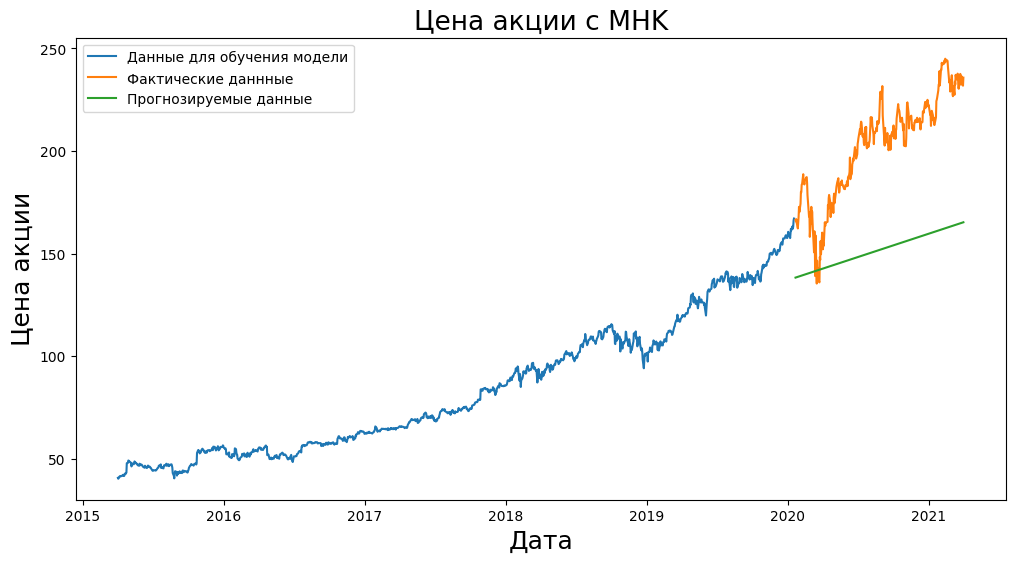

In [ ]:
def linear_regression_prediction(df):
    shape=df.shape[0] #общее кол-во строк
    df_new=df[['Close']]
    df_new.head()
    train_set=df_new.iloc[:ceil(shape*0.8)] #возвращает индексирование. первые значения, на которых будем учиться и прогнозировать
    valid_set=df_new.iloc[ceil(shape*0.8):] #значения по которым будем сравнивать
    train=train_set.reset_index() #Сбросить индекс фрейма данных и использовать вместо него индекс по умолчанию
    valid=valid_set.reset_index()
    x_train = train['Date'].map(dt.datetime.toordinal) #Линейная регрессия не работает с данными даты. Поэтому нам нужно преобразовать ее в числовое значение
    y_train = train[['Close']]
    x_valid = valid['Date'].map(dt.datetime.toordinal)
    y_valid = valid[['Close']]
    model = LinearRegression()
    model.fit(np.array(x_train).reshape(-1,1),y_train) #обучение модели
    preds = model.predict(np.array(x_valid).reshape(-1,1)) #предскажем получившимися моделями
    rms=np.sqrt(np.mean(np.power((np.array(valid_set['Close'])-preds),2))) #возвращает неотрицательный квадратный корень массива поэлементно
    valid_set['Predictions'] = preds
    plt.figure(figsize = (12,6))
    plt.plot(train_set['Close'])
    plt.plot(valid_set[['Close', 'Predictions']])
    plt.xlabel('Дата', size=18)
    plt.ylabel('Цена акции', size=18)
    plt.title('Цена акции с MHK', size=19)
    plt.legend(['Данные для обучения модели','Фактические даннные','Прогнозируемые данные'])

linear_regression_prediction(df)

**ARIMA**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/

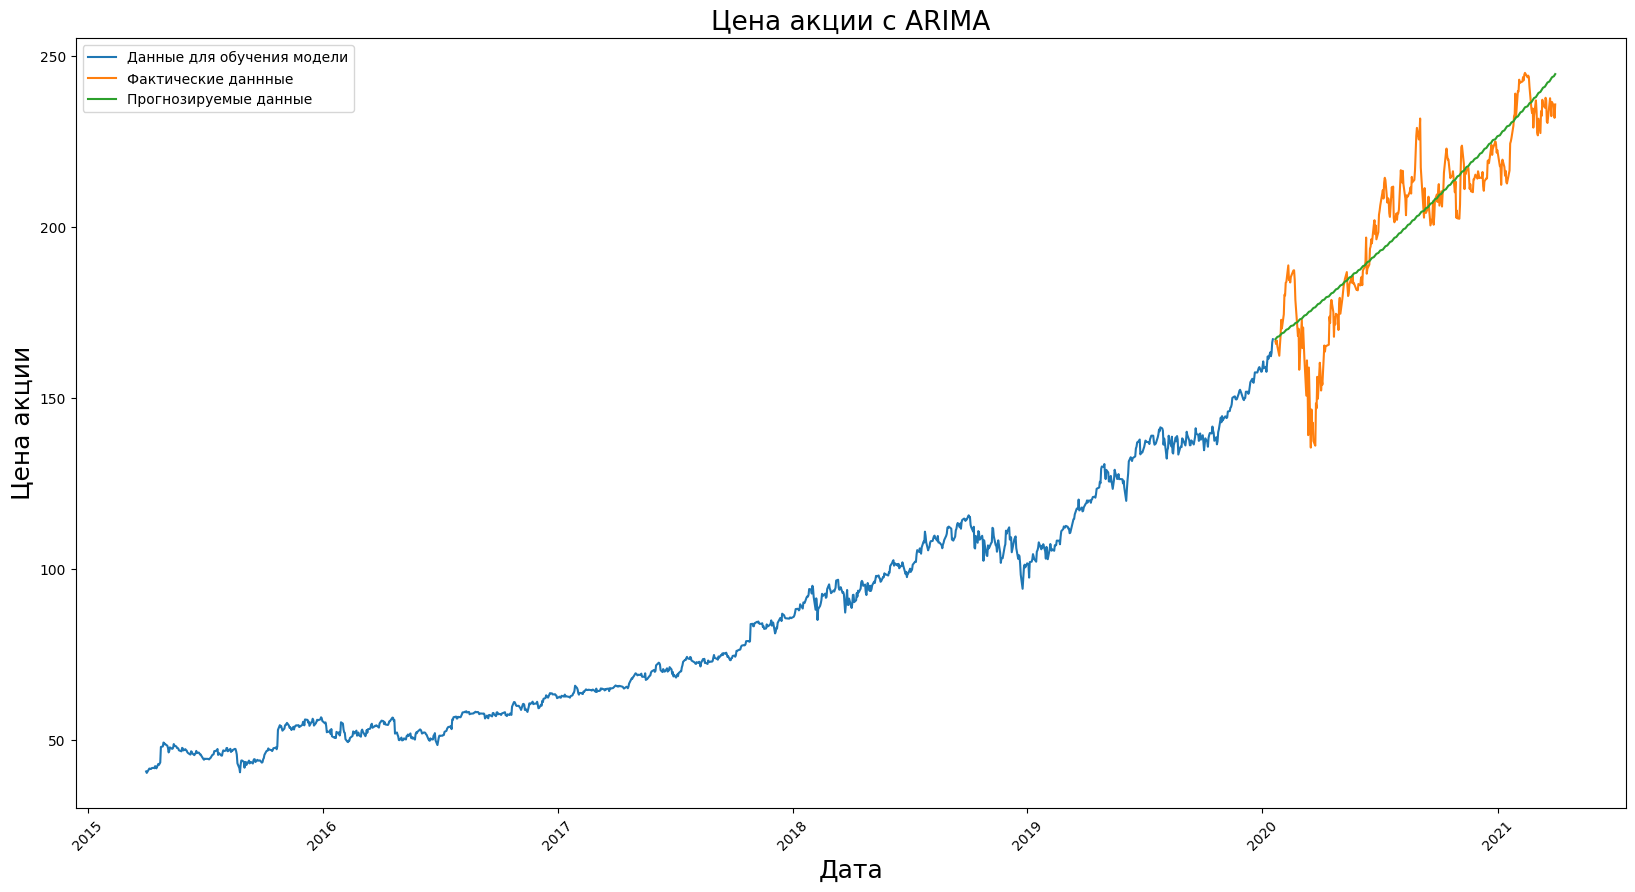

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
shape=df.shape[0] #общее кол-во строк
df_new=df[['Close']]
df_new.head()
train =df_new.iloc[:ceil(shape*0.8)] #возвращает индексирование. первые значения, на которых будем учиться и прогнозировать
test =df_new.iloc[ceil(shape*0.8):] #значения по которым будем сравнивать
plt.plot(train)
plt.plot(test)
plt.ylabel("Stock Price")
plt.xlabel("Date")
plt.xticks(rotation=45)

y = train["Close"]
ARMAmodel = SARIMAX (y, order = (1, 0, 1), seasonal_order= (1,0,0,12),enforce_stationarity=False)
#enforance_stationary: следует ли преобразовывать параметры AR для обеспечения стационарности в авторегрессионном компоненте модели
#seasonal_order: ежемесячные
ARMAmodel = ARMAmodel.fit() #обучение модели
y_pred = ARMAmodel.get_forecast(len(test.index)) #Прогнозы вне выборки и интервалы прогнозирования
y_pred_df = y_pred.conf_int(alpha = 0.05) #доверительный интервал для подобранных параметров
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1]) #предсказание
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]
plt.xlabel('Дата', size=18)
plt.ylabel('Цена акции', size=18)
plt.title('Цена акции с ARIMA', size=19)
plt.plot(y_pred_out, label = "Predictions")
plt.legend(['Данные для обучения модели','Фактические даннные','Прогнозируемые данные'])
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/pyt

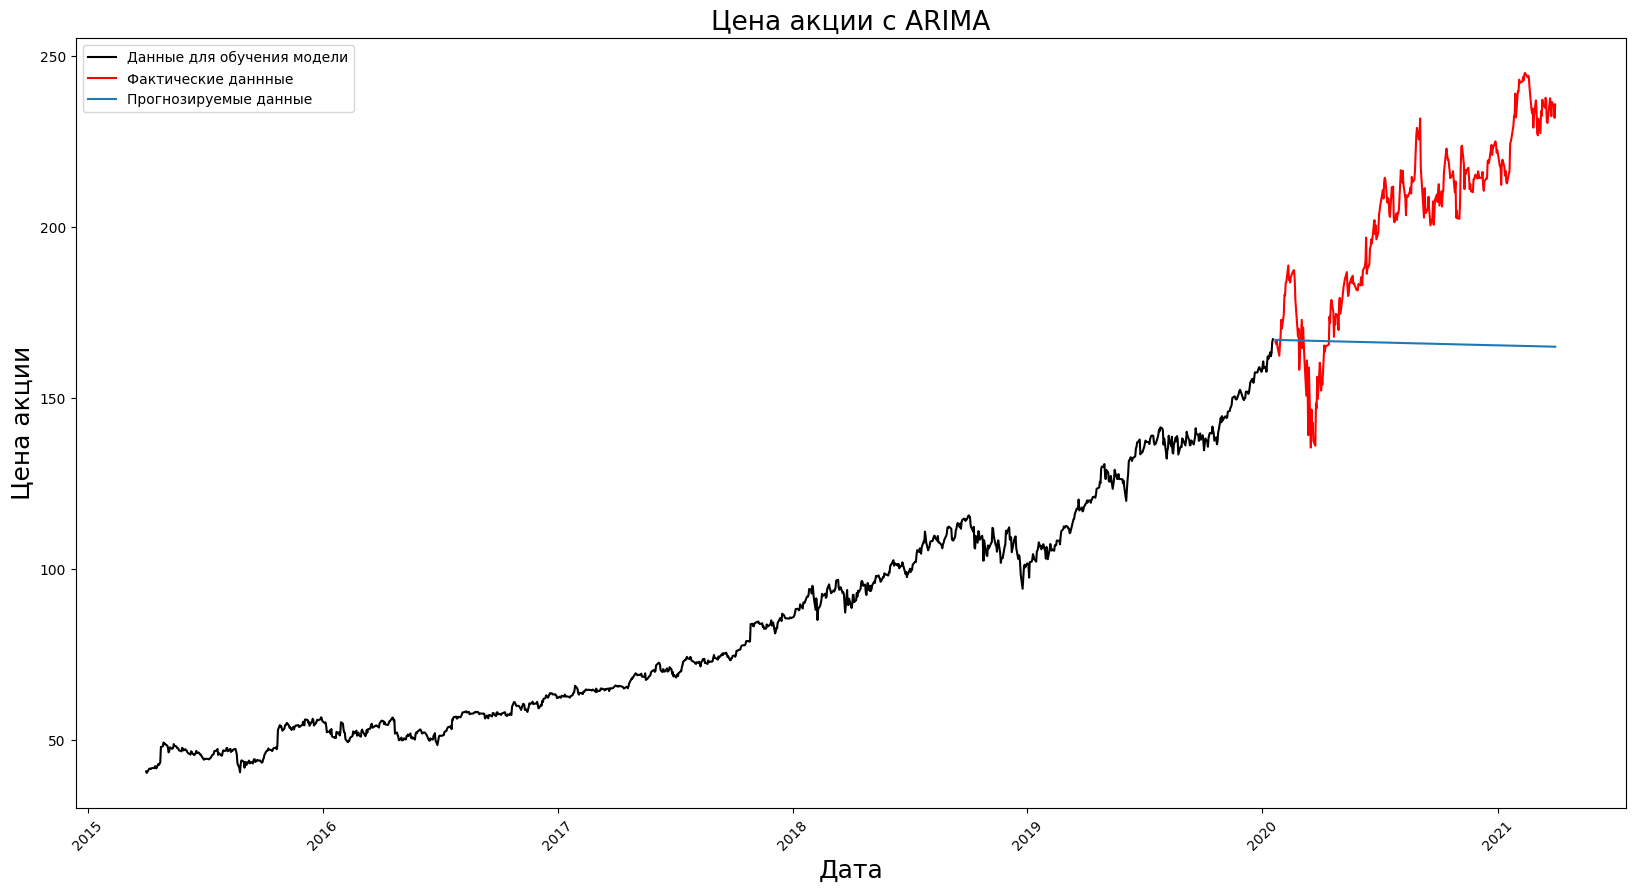

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
shape=df.shape[0]
df_new=df[['Close']]
df_new.head()
train =df_new.iloc[:ceil(shape*0.8)]
test =df_new.iloc[ceil(shape*0.8):]
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel("Stock Price")
plt.xlabel("Date")
plt.xticks(rotation=45)

y = train["Close"]
ARMAmodel = SARIMAX (y, order = (1, 0, 1))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]
plt.xlabel('Дата', size=18)
plt.ylabel('Цена акции', size=18)
plt.title('Цена акции с ARIMA', size=19)
plt.plot(y_pred_out, label = "Predictions")
plt.legend(['Данные для обучения модели','Фактические даннные','Прогнозируемые данные'])
plt.show()